In [1]:
import pandas as pd
import SPARQLWrapper as sw

In [2]:
import requests

In [3]:
import networkx as nx
import requests
import json
import random
from faker import Faker

fake = Faker()

WIKIDATA_SPARQL_URL = "https://query.wikidata.org/sparql"
OVERPASS_API_URL = "http://overpass-api.de/api/interpreter"

In [4]:
def run_sparql_query(query):
    """Fetch data from Wikidata using SPARQL."""
    headers = {"Accept": "application/json"}
    response = requests.get(WIKIDATA_SPARQL_URL, params={"query": query, "format": "json"}, headers=headers)
    if response.status_code == 200:
        return response.json()["results"]["bindings"]
    else:
        print("SPARQL Query Failed!", response.status_code)
        return []

In [6]:
def fetch_ceos_and_companies():
    """Fetch CEOs and their companies from Wikidata."""
    query = """
    SELECT ?ceo ?ceoLabel ?company ?companyLabel WHERE {
      ?company wdt:P169 ?ceo.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    LIMIT 20
    """
    data = run_sparql_query(query)
    G = nx.DiGraph()

    for item in data:
        ceo_id = item["ceo"]["value"].split("/")[-1]
        company_id = item["company"]["value"].split("/")[-1]
        ceo_name = item["ceoLabel"]["value"]
        company_name = item["companyLabel"]["value"]

        G.add_node(ceo_id, type="Person", name=ceo_name)
        G.add_node(company_id, type="Organization", name=company_name)
        G.add_edge(ceo_id, company_id, relationship="CEO_of")

    return G

In [14]:
import matplotlib.pyplot as plt 

In [7]:
ceos_and_companies = fetch_ceos_and_companies()

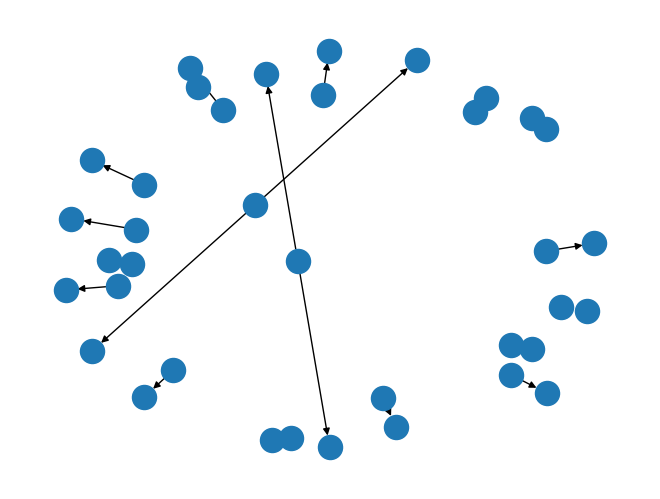

In [20]:

nx.draw(ceos_and_companies, with_labels=False, font_weight="bold")

In [21]:
class Graphfaker:
    @staticmethod
    def generate_people(num=10):
        G = nx.Graph()
        for i in range(num):
            pid = f"person_{i}"
            G.add_node(pid, type="Person", name=fake.name(), email=fake.email(), age=random.randint(18, 80))
        return G

    @staticmethod
    def generate_places(num=5):
        G = nx.Graph()
        for i in range(num):
            cid = f"city_{i}"
            G.add_node(cid, type="Place", name=fake.city(), country=fake.country())
        return G

    @staticmethod
    def generate_organizations(num=5):
        G = nx.Graph()
        for i in range(num):
            oid = f"org_{i}"
            G.add_node(oid, type="Organization", name=fake.company(), industry=fake.job())
        return G

    @staticmethod
    def connect_people_to_organizations(G, people_nodes, org_nodes):
        for p in people_nodes:
            org = random.choice(org_nodes)
            G.add_edge(p, org, relationship=random.choice(["works_at", "consults_for", "owns"]))

    @staticmethod
    def connect_people_to_places(G, people_nodes, place_nodes):
        for p in people_nodes:
            place = random.choice(place_nodes)
            G.add_edge(p, place, relationship=random.choice(["lives_in", "born_in"]))

In [22]:
G_people = Graphfaker.generate_people(10)
G_fake_places = Graphfaker.generate_places(5)
G_fake_orgs = Graphfaker.generate_organizations(5)

Graphfaker.connect_people_to_organizations(G_people, list(G_people.nodes), list(G_fake_orgs.nodes))
Graphfaker.connect_people_to_places(G_people, list(G_people.nodes), list(G_fake_places.nodes))

In [29]:
G_people.nodes()

NodeView(('person_0', 'person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7', 'person_8', 'person_9', 'org_2', 'org_1', 'org_3', 'org_4', 'org_0', 'city_2', 'city_3', 'city_4', 'city_0', 'city_1'))

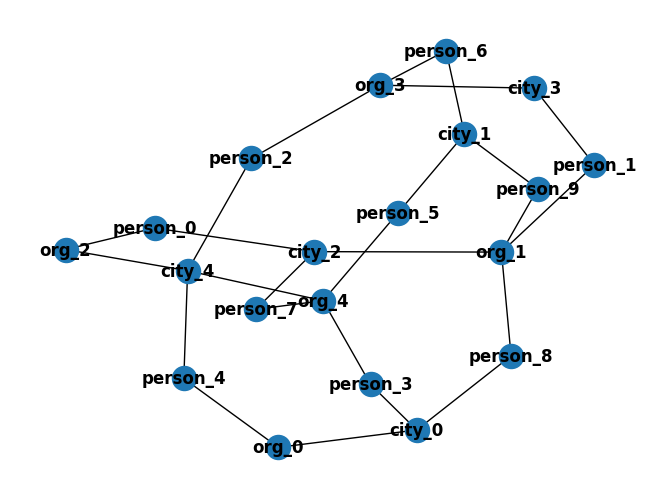

In [31]:
nx.draw(G_people, with_labels=True, font_weight="bold")

In [11]:
print(ceos_and_companies.nodes(data=True))

[('Q5', {'type': 'Person', 'name': 'human'}), ('Q113071363', {'type': 'Organization', 'name': 'Demiplane'}), ('Q118126535', {'type': 'Organization', 'name': 'American YouthWorks'}), ('Q4864', {'type': 'Person', 'name': 'Eugene Kaspersky'}), ('Q489943', {'type': 'Organization', 'name': 'Kaspersky Lab'}), ('Q11628', {'type': 'Person', 'name': 'Margaret Hamilton'}), ('Q53390536', {'type': 'Organization', 'name': 'Hamilton Technologies'}), ('Q14086', {'type': 'Person', 'name': 'Marissa Mayer'}), ('Q30321616', {'type': 'Organization', 'name': 'Altaba'}), ('Q19837', {'type': 'Person', 'name': 'Steve Jobs'}), ('Q308993', {'type': 'Organization', 'name': 'NeXT'}), ('Q28085', {'type': 'Person', 'name': 'Adolf Eichmann'}), ('Q2139834', {'type': 'Organization', 'name': 'Reichszentrale für jüdische Auswanderung'}), ('Q32055', {'type': 'Person', 'name': 'Bernard Arnault'}), ('Q504998', {'type': 'Organization', 'name': 'LVMH'}), ('Q34460', {'type': 'Person', 'name': 'Gwyneth Paltrow'}), ('Q37848061'

In [ ]:
def fetch_places():
    """Fetch major cities from Wikidata."""
    query = """
    SELECT ?city ?cityLabel WHERE {
      ?city wdt:P31 wd:Q515.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    LIMIT 20
    """
    data = WikidataFetcher.run_sparql_query(query)
    G = nx.DiGraph()

    for item in data:
        city_id = item["city"]["value"].split("/")[-1]
        city_name = item["cityLabel"]["value"]

        G.add_node(city_id, type="Place", name=city_name)

    return G

In [3]:
query = """
SELECT ?city ?cityLabel ?location ?locationLabel ?founding_date
WHERE {
  ?city wdt:P31/wdt:P279* wd:Q515.
  ?city wdt:P17 wd:Q30.
  ?city wdt:P625 ?location.
  ?city wdt:P571 ?founding_date.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
"""

In [5]:
import sys
import pandas as pd
from typing import List, Dict
from SPARQLWrapper import SPARQLWrapper, JSON

class WikiDataQueryResults:
    """
    A class that can be used to query data from Wikidata using SPARQL and return the results as a Pandas DataFrame or a list
    of values for a specific key.
    """
    def __init__(self, query: str):
        """
        Initializes the WikiDataQueryResults object with a SPARQL query string.
        :param query: A SPARQL query string.
        """
        self.user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
        self.endpoint_url = "https://query.wikidata.org/sparql"
        self.sparql = SPARQLWrapper(self.endpoint_url, agent=self.user_agent)
        self.sparql.setQuery(query)
        self.sparql.setReturnFormat(JSON)

    def __transform2dicts(self, results: List[Dict]) -> List[Dict]:
        """
        Helper function to transform SPARQL query results into a list of dictionaries.
        :param results: A list of query results returned by SPARQLWrapper.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        new_results = []
        for result in results:
            new_result = {}
            for key in result:
                new_result[key] = result[key]['value']
            new_results.append(new_result)
        return new_results

    def _load(self) -> List[Dict]:
        """
        Helper function that loads the data from Wikidata using the SPARQLWrapper library, and transforms the results into
        a list of dictionaries.
        :return: A list of dictionaries, where each dictionary represents a result row and has keys corresponding to the
        variables in the SPARQL SELECT clause.
        """
        results = self.sparql.queryAndConvert()['results']['bindings']
        results = self.__transform2dicts(results)
        return results

    def load_as_dataframe(self) -> pd.DataFrame:
        """
        Executes the SPARQL query and returns the results as a Pandas DataFrame.
        :return: A Pandas DataFrame representing the query results.
        """
        results = self._load()
        return pd.DataFrame.from_dict(results)

In [6]:
data_extracter = WikiDataQueryResults(query)

In [7]:
data_extracter

In [8]:
df = data_extracter.load_as_dataframe()
print(df.head())

                                    city         founding_date  \
0     http://www.wikidata.org/entity/Q62  1776-06-29T00:00:00Z   
1     http://www.wikidata.org/entity/Q65  1781-09-04T00:00:00Z   
2  http://www.wikidata.org/entity/Q16552  1769-07-16T00:00:00Z   
3  http://www.wikidata.org/entity/Q16553  1777-11-29T00:00:00Z   
4  http://www.wikidata.org/entity/Q16739  1888-01-01T00:00:00Z   

                             location      cityLabel  \
0        Point(-122.419444444 37.775)  San Francisco   
1          Point(-118.24368 34.05223)    Los Angeles   
2             Point(-117.1625 32.715)      San Diego   
3  Point(-121.872777777 37.304166666)       San Jose   
4  Point(-118.195555555 33.768055555)     Long Beach   

                        locationLabel  
0        Point(-122.419444444 37.775)  
1          Point(-118.24368 34.05223)  
2             Point(-117.1625 32.715)  
3  Point(-121.872777777 37.304166666)  
4  Point(-118.195555555 33.768055555)  


In [12]:
from faker import Faker
fake = Faker()

In [16]:
fake.name()

'Kristy Mcguire'

In [36]:
fake.company()


'Jones-Johnson'

In [7]:
import networkx as nx
import json
import random
from faker import Faker



In [8]:
query = """
        SELECT ?ceo ?ceoLabel ?company ?companyLabel WHERE {
          ?company wdt:P169 ?ceo.
          SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        LIMIT 20
        """
